# About the Dataset (Breast Cancer – Wisconsin Diagnostic)

- This dataset is a classic benchmark in machine learning, commonly used for binary classification tasks.

- Source: University of Wisconsin Hospitals, Madison — Dr. William H. Wolberg

- Availability :    **Built into scikit-learn (load_breast_cancer)**

- Domain: Healthcare (cancer detection)


Target:

- 0 → Malignant (cancerous)

- 1 → Benign (non-cancerous)


* NOTE

    For every tabular dataset, I apply a standard EDA step to detect outliers and study correlations:

###Imports

In [1]:
import os, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
ConfusionMatrixDisplay, RocCurveDisplay
)

###Load dataset

In [2]:
# This is how you load the build in data sets
data = load_breast_cancer(as_frame=True)

# makes a separate copy so you don’t accidentally modify the original object.
df  = data.frame.copy()

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


###EDA

In [6]:
df.shape

(569, 31)

In [8]:
df.dtypes

,0
mean radius,float64
mean texture,float64
mean perimeter,float64
mean area,float64
mean smoothness,float64
mean compactness,float64
mean concavity,float64
mean concave points,float64
mean symmetry,float64
mean fractal dimension,float64


In [10]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [11]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [17]:
df["target"].value_counts(normalize=True)

,proportion
target,
1,0.627417
0,0.372583


###Quick look at distributions

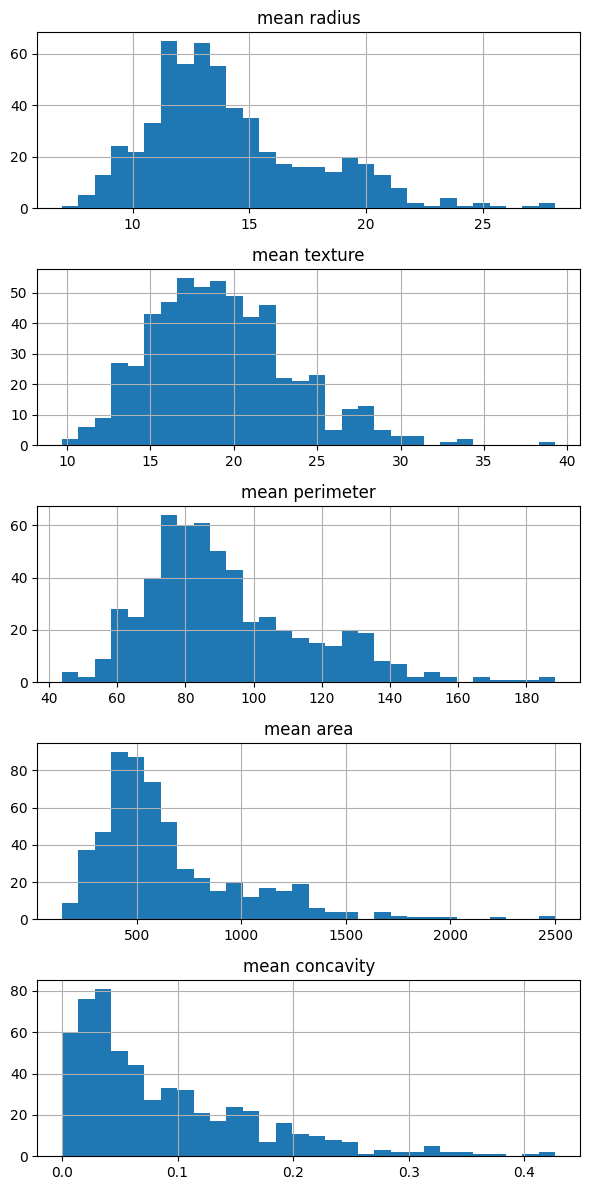

In [18]:
import matplotlib.pyplot as plt

key_feats = ["mean radius", "mean texture", "mean perimeter", "mean area", "mean concavity"]
df[key_feats + ["target"]].head()

fig, axes = plt.subplots(len(key_feats), 1, figsize=(6, 12))
for ax, col in zip(axes, key_feats):
    df[col].hist(ax=ax, bins=30)
    ax.set_title(col)
plt.tight_layout()
plt.show()


###Correlation scan (what’s strongly linked to target / features)

In [19]:
import numpy as np

# Pearson correlations (features only)
corr = df.drop(columns=["target"]).corr()

# Top 10 features correlated with 'mean radius' (example)
print("Top correlated with 'mean radius':")
print(corr['mean radius'].sort_values(ascending=False).head(10))

# Correlation with target (needs numeric target; already 0/1)
target_corr = df.corr(numeric_only=True)['target'].sort_values(ascending=False)
print("\nFeatures most positively correlated with target (1 = benign):")
print(target_corr.head(10))
print("\nFeatures most negatively correlated with target (toward malignant):")
print(target_corr.tail(10))


Top correlated with 'mean radius':
mean radius             1.000000
mean perimeter          0.997855
mean area               0.987357
worst radius            0.969539
worst perimeter         0.965137
worst area              0.941082
mean concave points     0.822529
worst concave points    0.744214
area error              0.735864
radius error            0.679090
Name: mean radius, dtype: float64

Features most positively correlated with target (1 = benign):
target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
Name: target, dtype: float64

Features most negatively correlated with target (toward malignant):
worst concavity        -0.659610
mean concavity         -0.696360
mean area     

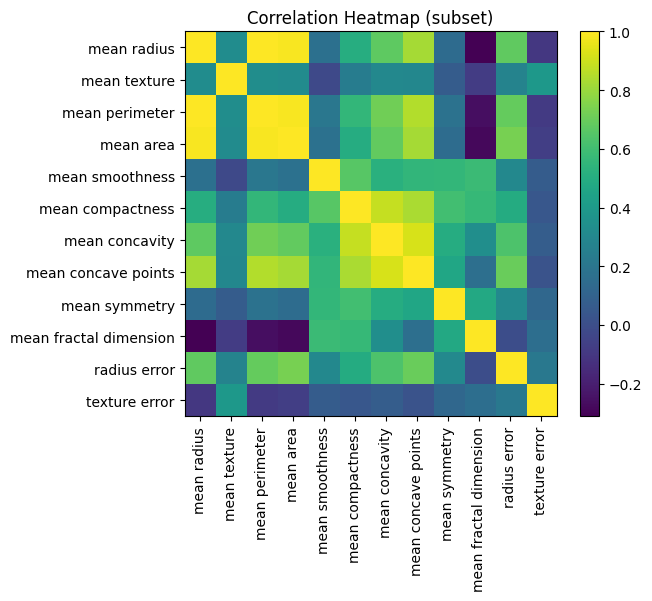

In [21]:
import matplotlib.pyplot as plt

sub_corr = corr.iloc[:12, :12]  # show only first 12 cols (optional)
plt.figure(figsize=(6,5))
plt.imshow(sub_corr, aspect="auto")
plt.colorbar()
plt.title("Correlation Heatmap (subset)")
plt.xticks(range(sub_corr.shape[1]), sub_corr.columns, rotation=90)
plt.yticks(range(sub_corr.shape[0]), sub_corr.index)
plt.show()


###Quick outlier count

In [20]:
# Count values with |z| > 3 per column (rough outlier signal)
from scipy.stats import zscore

zs = df.drop(columns=["target"]).apply(zscore)
outliers_per_col = (np.abs(zs) > 3).sum().sort_values(ascending=False)
print("Outliers per column (|z| > 3):")
print(outliers_per_col.head(10))


Outliers per column (|z| > 3):
compactness error          12
symmetry error             11
worst area                 10
fractal dimension error    10
worst compactness          10
mean compactness            9
texture error               9
worst fractal dimension     9
worst symmetry              9
mean concavity              9
dtype: int64


###Train Validation Split

❌ Problem with only Train/Test split

Suppose you want to tune hyperparameters (e.g., C in Logistic Regression, max_depth in RandomForest).

If you keep adjusting until the test score looks best, you’re indirectly “training on test”.

This is called data leakage → your test set is no longer an unseen dataset.

So your test accuracy will look artificially good, but the model may fail in real-world deployment.

In [24]:
X = df.drop(columns=["target"])
y = df["target"]

In [26]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [27]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [29]:
# 15% test split
X_train_val, X_test, y_train_val, y_test = train_test_split(

                                                 X,y,
                                                 test_size =0.2,  # 15% of the dataset will go into the test set
                                                 random_state=42, # split is always the same. it ensures reproducibility.
                                                 stratify=y       # This makes sure the class distribution (0=malignant, 1=benign) is preserved in train and test.

)

In [30]:
# From the remaining 85%, take ~15% for validation
X_train, X_val, y_train, y_val = train_test_split(
                                                    X_train_val,
                                                    y_train_val,
                                                    test_size=0.1765,
                                                    random_state=42,
                                                    stratify=y_train_val
)

In [31]:
print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (374, 30) (374,)
Validation shape: (81, 30) (81,)
Test shape: (114, 30) (114,)


### Scaling


### 🔎 Why we use `fit_transform` on Train and only `transform` on Val/Test

### 📖 Standardization Formula

\[
z = \frac{x - \mu}{\sigma}
\]

Where:  

- **μ (mu)** = mean of the training data  
- **σ (sigma)** = standard deviation of the training data  

**Effect:** Each feature becomes standardized with **mean = 0** and **std = 1**.


- **μ (mean)** and **σ (standard deviation)** must be learned **only from the training set**.  
- This avoids **data leakage** (the model accidentally “seeing” future/validation/test info).  

**Steps:**
1. `scaler.fit_transform(X_train)` → learns μ and σ from training data, then scales training features.  
2. `scaler.transform(X_val)` and `scaler.transform(X_test)` → applies the *same* μ and σ to validation/test.  

**Why not fit on test?**
- If you run `fit_transform` on test, the scaling would use test statistics → inconsistent with training.  
- It’s like peeking at exam answers before solving the paper → unfair and unrealistic.  

✅ Correct workflow:  
- `fit_transform` → **train only**  
- `transform` → **val/test**  


In [32]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

### Evaluation Helper

You can use this costam fuc in any model,datasets

In [33]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    ConfusionMatrixDisplay, RocCurveDisplay
)
import pandas as pd
import matplotlib.pyplot as plt

def evaluate(model, Xs, y, name, save_prefix=None):
    """
    Evaluate a classification model and return metrics.

    Parameters:
    - model: trained sklearn model
    - Xs: features (scaled if needed)
    - y: true labels
    - name: label for printing/plots
    - save_prefix: if set, saves metrics to reports/{save_prefix}_metrics.json
    """

    # Probabilities or decision scores
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(Xs)[:, 1]
    else:
        y_prob = model.decision_function(Xs)

    # Default threshold = 0.5
    y_pred = (y_prob >= 0.5).astype(int)

    # Metrics
    metrics = {
        "accuracy":  accuracy_score(y, y_pred),
        "precision": precision_score(y, y_pred),
        "recall":    recall_score(y, y_pred),
        "f1":        f1_score(y, y_pred),
        "roc_auc":   roc_auc_score(y, y_prob),
    }
    print(f"\n{name} metrics:", metrics)

    # Confusion matrix
    ConfusionMatrixDisplay.from_predictions(y, y_pred)
    plt.title(f"{name} – Confusion Matrix")
    plt.show()

    # ROC curve
    RocCurveDisplay.from_predictions(y, y_prob)
    plt.title(f"{name} – ROC Curve")
    plt.show()

    # Save if required
    if save_prefix:
        pd.DataFrame([metrics]).to_json(
            f"reports/{save_prefix}_metrics.json", orient='records', indent=2
        )

    return metrics

print("✅ Evaluation helper ready to use")


✅ Evaluation helper ready to use


1. max_iter=1000

    Logistic Regression trains by finding the best weights using an optimization algorithm (iterative).

    max_iter = maximum number of iterations allowed for the solver to converge.

2. solver="lbfgs"

    The solver is the optimization algorithm used to find the best coefficients (weights).

    "lbfgs" = Limited-memory Broyden–Fletcher–Goldfarb–Shanno.

    Works well for small-to-medium datasets.

    Supports multinomial classification.

    Handles L2 regularization (the default).

3. random_state=42

    Logistic Regression uses random numbers internally (e.g., for weight initialization, shuffling).

    random_state fixes the random seed so you always get the same results when you rerun the code.

    42 is just a convention (any number works).

In [35]:
lr = LogisticRegression(
                        max_iter=1000,
                        solver="lbfgs",
                        random_state=42
                        )


In [37]:
lr.fit(X_train_s,y_train)

LogisticRegression(max_iter=1000, random_state=42)


Logistic Regression (Validation) metrics: {'accuracy': 0.9753086419753086, 'precision': 0.9803921568627451, 'recall': 0.9803921568627451, 'f1': 0.9803921568627451, 'roc_auc': np.float64(0.9973856209150327)}


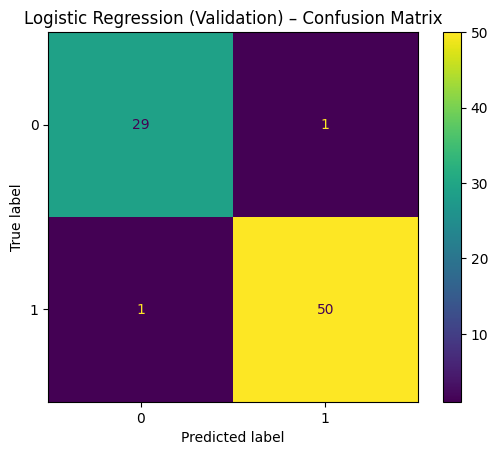

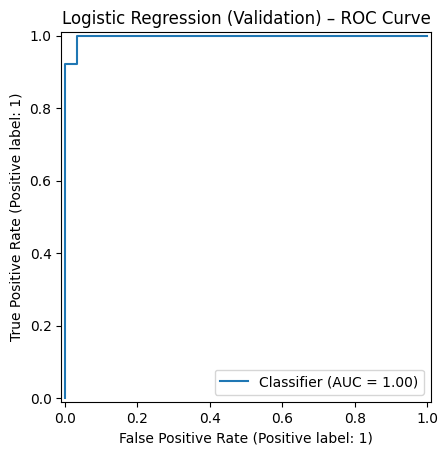

In [41]:
import os

# Create the reports directory if it doesn't exist
if not os.path.exists("reports"):
    os.makedirs("reports")

val_metrics_lr = evaluate(
    lr,
    X_val_s,
    y_val,
    name = "Logistic Regression (Validation)", # Added the name argument
    save_prefix = "lr_val"
)

In [42]:
val_metrics_lr

{'accuracy': 0.9753086419753086,
 'precision': 0.9803921568627451,
 'recall': 0.9803921568627451,
 'f1': 0.9803921568627451,
 'roc_auc': np.float64(0.9973856209150327)}


RandomForest (val) metrics: {'accuracy': 0.9506172839506173, 'precision': 0.9607843137254902, 'recall': 0.9607843137254902, 'f1': 0.9607843137254902, 'roc_auc': np.float64(0.9745098039215686)}


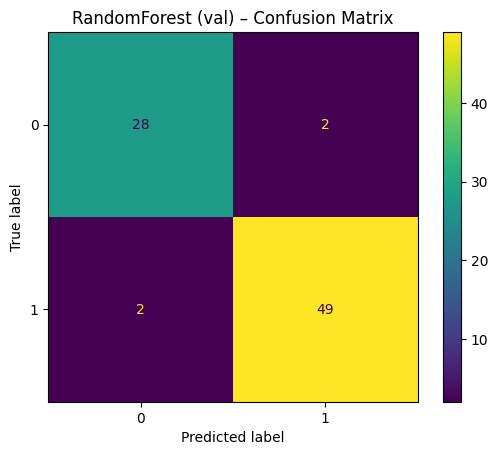

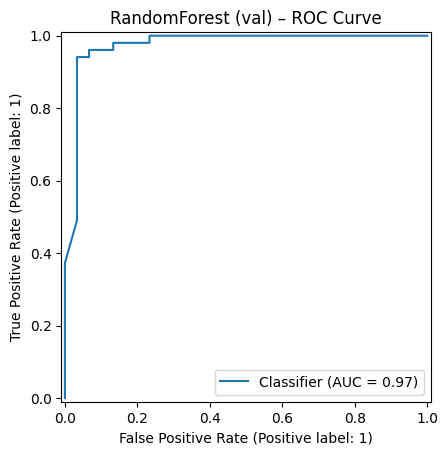

{'accuracy': 0.9506172839506173,
 'precision': 0.9607843137254902,
 'recall': 0.9607843137254902,
 'f1': 0.9607843137254902,
 'roc_auc': np.float64(0.9745098039215686)}

In [43]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train Random Forest on raw (unscaled) features
rf = RandomForestClassifier(
    n_estimators=400,        # number of trees (more trees = more stable)
    max_depth=None,          # let trees grow until pure
    min_samples_split=2,     # minimum samples to split a node
    min_samples_leaf=1,      # minimum samples per leaf
    random_state=42,
    n_jobs=-1                # use all CPU cores
)

rf.fit(X_train, y_train)

# Validate
val_metrics_rf = evaluate(rf, X_val, y_val, "RandomForest (val)", save_prefix="rf_val")
val_metrics_rf


As youn can see the winner is logistic Regression